<a href="https://colab.research.google.com/github/StevenMElliott/DS-Unit-2-Tree-Ensembles/blob/master/Kaggle_Tanzinia_Compitition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

LOCAL = '../data/tanzania/'
WEB = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/tanzania/'

train = pd.merge(pd.read_csv(WEB + 'train_features.csv'), 
                 pd.read_csv(WEB + 'train_labels.csv'))
test = pd.read_csv(WEB + 'test_features.csv')
sample_submission = pd.read_csv(WEB + 'sample_submission.csv')

# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

train.shape, val.shape, test.shape

ModuleNotFoundError: ignored

In [0]:
train['construction_year'] = train['construction_year'].replace(0,1985)
val['construction_year'] = val['construction_year'].replace(0,1985)
test['construction_year'] = test['construction_year'].replace(0,1985)

In [0]:
# !pip install -U pandas-profiling

In [0]:
# train = train.replace(0,)

In [0]:
# import pandas_profiling
# train_features.profile_report()

In [0]:
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,47520.000000,47520.000000,47520.000000,47520.000000,4.752000e+04,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000
mean,37037.915699,321.925261,669.567656,34.082431,-5.705946e+00,0.477736,15.258291,5.616751,179.805513,1992.715173
std,21412.099719,3197.240487,693.005745,6.552053,2.941332e+00,13.312977,17.530228,9.621230,463.081564,11.560256
min,0.000000,0.000000,-63.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,1960.000000
25%,18482.750000,0.000000,0.000000,33.092142,-8.528215e+00,0.000000,5.000000,2.000000,0.000000,1985.000000
50%,36986.500000,0.000000,372.500000,34.910740,-5.021436e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55450.250000,25.000000,1320.000000,37.170578,-3.327185e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.344301,-2.000000e-08,1776.000000,99.000000,80.000000,15300.000000,2013.000000


In [0]:
explore = train.query('construction_year > 0')
explore1 = train.query('construction_year == 1995')
explore2 = train.query('construction_year == 0')
print('train\n', train['status_group'].value_counts(normalize=True))
# print('Great than 1\n', explore['status_group'].value_counts(normalize=True))
print('test\n', explore1['status_group'].value_counts(normalize=True))
# print('Is unknown\n', explore2['status_group'].value_counts(normalize=True))

train
 functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64
test
 functional                 0.582725
non functional             0.340633
functional needs repair    0.076642
Name: status_group, dtype: float64


In [0]:
#Function for testing MAE and R^2 for test and train
def error():
  #train mae
  y_true = train[target]
  y_pred = model.predict(train[features])
  train_error = mean_absolute_error(y_true, y_pred)
  
  #test mae
  y_true = test[target]
  y_pred = model.predict(test[features])
  test_error = mean_absolute_error(y_true, y_pred)
  
  #print the MAE and R^2
  print('Train MAE $', round(train_error, 2))
  print('Test MAE $', round(test_error, 2))

In [0]:
features = ['longitude', 'latitude', 'population', 'construction_year']
target = 'status_group'

# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

# Encoder: fit_transform on train, transform on val & test
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

# Scaler: fit_transform on train, transform on val & test
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [0]:
model = LogisticRegression(solver='lbfgs', multi_class='auto', n_jobs=-1)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))
y_pred = model.predict(X_test_scaled)

Validation Accuracy 0.567929292929293


In [0]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, min_samples_leaf=24)
dt.fit(X_train_scaled, y_train)
print('Decision Tree:')
print('Train Accuracy', dt.score(X_train_scaled, y_train))
print('Validation Accuracy', dt.score(X_val_scaled, y_val))

Decision Tree:
Train Accuracy 0.7217592592592592
Validation Accuracy 0.669949494949495


In [0]:
features = ['longitude', 'latitude', 'population', 'construction_year', 'extraction_type_group', 'management', 'quantity', 'waterpoint_type_group', 'water_quality', 'gps_height']
target = 'status_group'

# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

# Encoder: fit_transform on train, transform on val & test
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

# Scaler: fit_transform on train, transform on val & test
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

dt = DecisionTreeClassifier(random_state=42, min_samples_leaf=24)
dt.fit(X_train_scaled, y_train)
print('Decision Tree:')
print('Train Accuracy', dt.score(X_train_scaled, y_train))
print('Validation Accuracy', dt.score(X_val_scaled, y_val))

Decision Tree:
Train Accuracy 0.7949284511784511
Validation Accuracy 0.7570707070707071


In [0]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
43360,72938,0.0,2011-07-27,NaN,0,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,1985,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
7263,65358,500.0,2011-03-23,Rc Church,2049,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175,True,GeoData Consultants Ltd,WUA,Tove Mtwango gravity Scheme,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2486,469,25.0,2011-03-07,Donor,290,Do,38.238568,-6.179919,Kwasungwini,0,Wami / Ruvu,Kwedigongo,Pwani,6,1,Bagamoyo,Mbwewe,2300,True,GeoData Consultants Ltd,VWC,NaN,False,2010,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
313,1298,0.0,2011-07-31,Government Of Tanzania,0,DWE,30.716727,-1.289055,Kwajovin 2,0,Lake Victoria,Kihanga,Kagera,18,1,Karagwe,Isingiro,0,True,GeoData Consultants Ltd,NaN,NaN,True,1985,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
52726,27001,0.0,2011-03-10,Water,0,Gove,35.389331,-6.399942,Chama,0,Internal,Mtakuj,Dodoma,1,6,Bahi,Nondwa,0,True,GeoData Consultants Ltd,VWC,Zeje,True,1985,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional


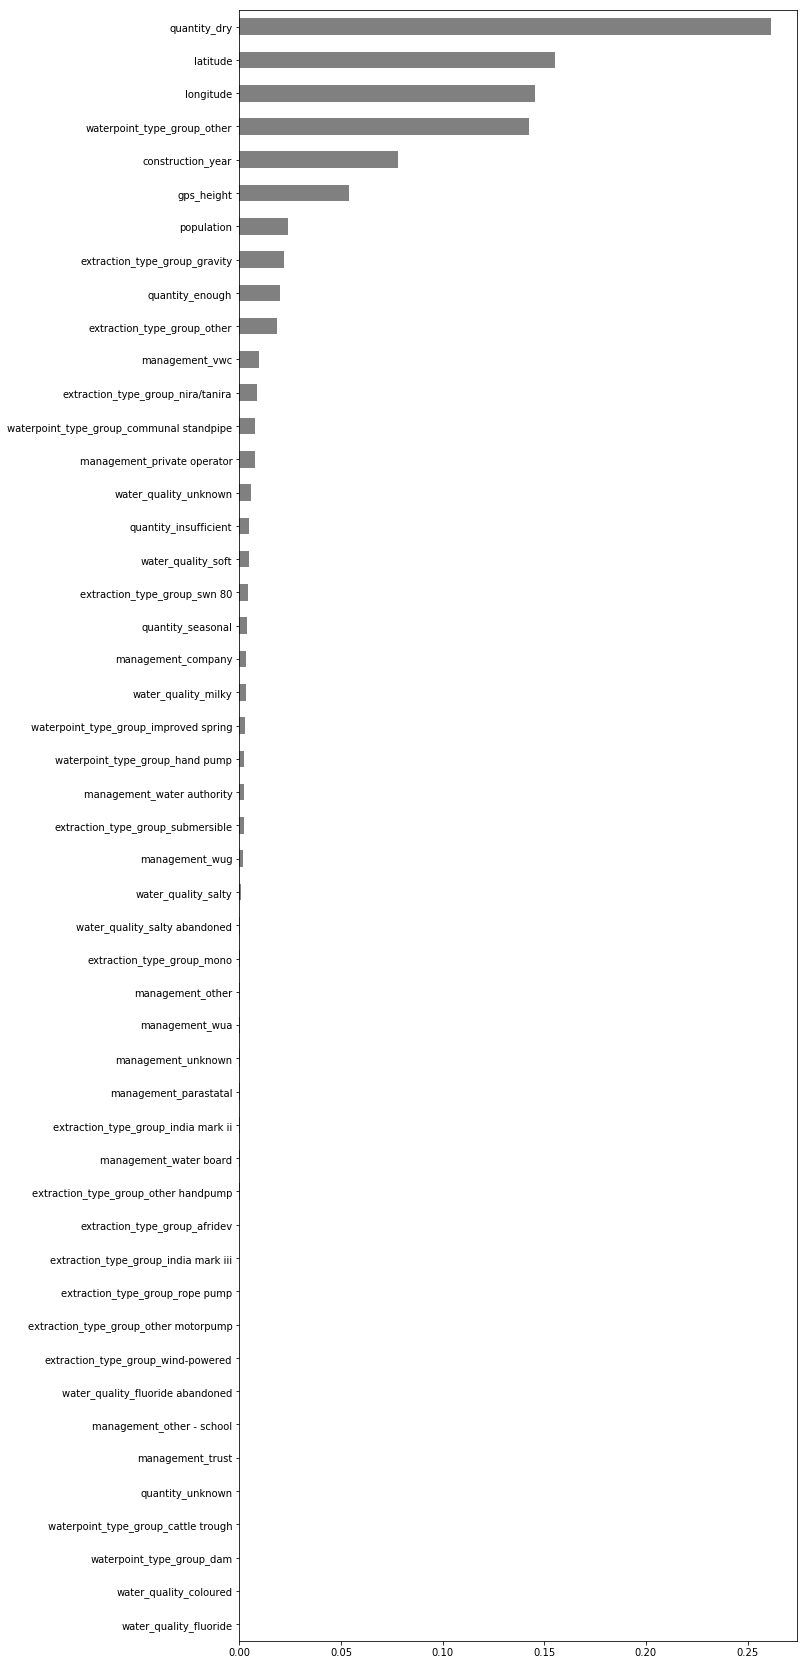

In [0]:
importances = pd.Series(dt.feature_importances_, 
                        X_train_encoded.columns)

plt.figure(figsize=(10,30))
importances.sort_values().plot.barh(color='grey');

In [0]:
y_pred = dt.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-01.csv', index=False)

In [0]:
submission['status_group'].value_counts(normalize=True)

functional                 0.615824
non functional             0.355899
functional needs repair    0.028277
Name: status_group, dtype: float64

In [0]:
# Decision Tree:
# Train Accuracy 0.7930345117845118
# Validation Accuracy 0.7591750841750842

# functional                 0.611715
# non functional             0.361610
# functional needs repair    0.026675
# Name: status_group, dtype: float64